In [178]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2 as cv

print(tf.__version__)


2.7.0


In [179]:
datasetfilename = 'numandataset.npz'

with np.load(datasetfilename, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabel = data['labels']
    dataLabelNames = data['labelnames']

print(dataImages.shape)
print(dataLabel.shape)
print(dataLabelNames.shape)

(34,)
(34,)
(34,)


In [180]:
dataImages.dtype, dataLabel.dtype, dataLabelNames.dtype

(dtype('O'), dtype('int32'), dtype('<U10'))

In [181]:
print(len(dataLabel))
print(dataLabel)
print(dataLabelNames)

34
[0 1 2 3 4 5 6 7 8 1 2 4 6 7 8 1 2 3 4 5 6 7 0 1 4 5 6 7 8 1 2 3 6 7]
['afiq' 'azureen' 'gavin' 'goke' 'inamul' 'jincheng' 'mahmuda' 'numan'
 'saseendran' 'azureen' 'gavin' 'inamul' 'mahmuda' 'numan' 'saseendran'
 'azureen' 'gavin' 'goke' 'inamul' 'jincheng' 'mahmuda' 'numan' 'afiq'
 'azureen' 'inamul' 'jincheng' 'mahmuda' 'numan' 'saseendran' 'azureen'
 'gavin' 'goke' 'mahmuda' 'numan']


In [182]:
classNames = sorted(np.unique(dataLabelNames))
classLabels = sorted(np.unique(dataLabel))

print(classNames)
print(classLabels)

['afiq', 'azureen', 'gavin', 'goke', 'inamul', 'jincheng', 'mahmuda', 'numan', 'saseendran']
[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [183]:
# Resize the images to be all in same size

import cv2 as cv

N = len(dataImages)
shape = (N, 200,200,3)

y = np.empty(shape, dtype='uint8')

for i in range(N):
    y[i] = cv.resize(dataImages[i], [200,200], interpolation=cv.INTER_NEAREST)
    
print(dataImages.dtype, y.dtype, y.shape)

dataImages = y

object uint8 (34, 200, 200, 3)


In [184]:
dataLabel = dataLabel.astype('uint8')
dataLabel.dtype

dtype('uint8')

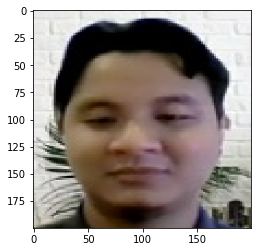

In [185]:
plt.imshow(dataImages[0][:,:,::-1])

(34, 200, 200)


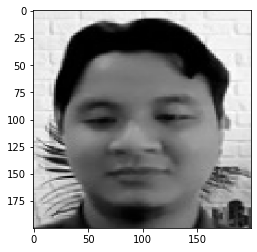

In [186]:
grayImages = []
for i in range(len(dataImages)):    
    gray = cv.cvtColor(dataImages[i], cv.COLOR_BGR2GRAY)
    grayImages.append(gray)
    
grayImages = np.array(grayImages)

print(grayImages.shape)
dataImages = grayImages.copy()

plt.imshow(cv.cvtColor(dataImages[0], cv.COLOR_GRAY2RGB))


In [187]:
# Split the data to train and test
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabel, test_size=0.3, random_state=42)

print(dataImages.shape)
print(dataLabel)

print(trainImages.shape)
print(testImages.shape)
print(testLabels)

(34, 200, 200)
[0 1 2 3 4 5 6 7 8 1 2 4 6 7 8 1 2 3 4 5 6 7 0 1 4 5 6 7 8 1 2 3 6 7]
(23, 200, 200)
(11, 200, 200)
[1 5 7 6 8 4 7 6 6 1 0]


In [188]:
# classNames = sorted(np.unique(dataLabelNames))
# dataLabel[0]

In [189]:
# plt.figure()

# i = 0
# plt.imshow(trainImages[i])
# plt.title(f'{trainLabels[i]}')
# # plt.xlabel(classNames[dataLabel[i]])
# plt.show()

In [190]:
import numpy as np

print(trainImages[0].shape)
print(trainImages[1].shape)

(200, 200)
(200, 200)


In [191]:
for i in range(len(trainImages)):
    trainImages[i] = cv.resize(trainImages[i], [200,200], interpolation=cv.INTER_NEAREST)


In [192]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

print(inputShape, outputShape)

(200, 200) 9


In [193]:
trainImages = trainImages / 255
testImages = testImages / 255

In [194]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Softmax(),
    tf.keras.layers.Dense(outputShape)
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 40000)             0         
                                                                 
 dense_20 (Dense)            (None, 128)               5120128   
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 9)                 1161      
                                                                 
Total params: 5,154,313
Trainable params: 5,154,313
Non-trainable params: 0
_________________________________________________________________


In [195]:
model.compile(optimizer='adam', loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [196]:
model.fit(trainImages, trainLabels, epochs=25)

Epoch 1/25
1/1 [==============================] - 0s 388ms/step - loss: 2.2275 - accuracy: 0.0870
Epoch 2/25
1/1 [==============================] - 0s 42ms/step - loss: 7.1858 - accuracy: 0.2174
Epoch 3/25
1/1 [==============================] - 0s 43ms/step - loss: 4.0158 - accuracy: 0.0870
Epoch 4/25
1/1 [==============================] - 0s 43ms/step - loss: 3.4181 - accuracy: 0.2609
Epoch 5/25
1/1 [==============================] - 0s 52ms/step - loss: 6.8482 - accuracy: 0.2174
Epoch 6/25
1/1 [==============================] - 0s 34ms/step - loss: 4.8946 - accuracy: 0.3913
Epoch 7/25
1/1 [==============================] - 0s 43ms/step - loss: 4.2749 - accuracy: 0.4348
Epoch 8/25
1/1 [==============================] - 0s 40ms/step - loss: 1.9012 - accuracy: 0.5652
Epoch 9/25
1/1 [==============================] - 0s 34ms/step - loss: 1.2682 - accuracy: 0.8261
Epoch 10/25
1/1 [==============================] - 0s 34ms/step - loss: 1.4535 - accuracy: 0.5652
Epoch 11/25
1/1 [===========

In [197]:
testLoss, testAcc = model.evaluate(testImages, testLabels, verbose=2)

print('\nTest accuracy:', testAcc)

1/1 - 0s - loss: 1.4215 - accuracy: 0.6364 - 131ms/epoch - 131ms/step

Test accuracy: 0.6363636255264282


In [198]:
predictions = model.predict(testImages)
predictions[0]

array([ 0.16826236,  9.364253  , -5.6508875 , -1.7632812 , -2.187679  ,
        4.950625  , -0.98447293,  5.5643215 ,  0.9226494 ], dtype=float32)

1 1 True
5 5 True
7 7 True
1 6 False
8 8 True
5 4 False
7 7 True
1 6 False
6 6 True
1 1 True
2 0 False
{0: 'afiq', 1: 'azureen', 2: 'gavin', 3: 'goke', 4: 'inamul', 5: 'jincheng', 6: 'mahmuda', 7: 'numan', 8: 'saseendran'}


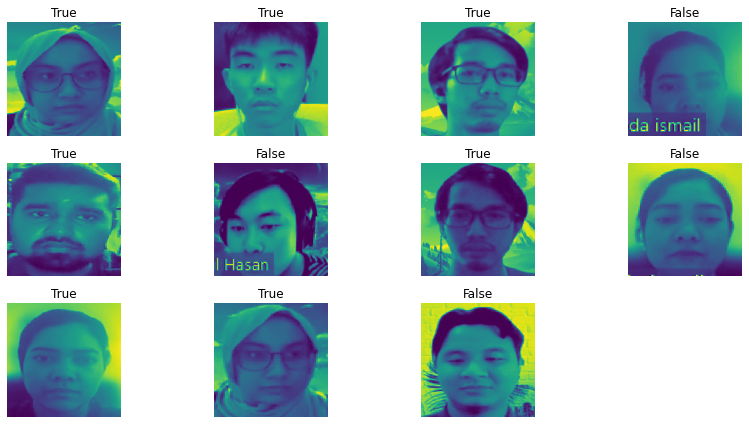

In [199]:
ix_names = dict(zip(classLabels, classNames))

a,b = 3,4
count = 1
plt.figure(figsize=(12,6))

for i in range(len(testImages)):
    predictedLabel = np.argmax(predictions[i])
    print(predictedLabel, testLabels[i], predictedLabel == testLabels[i])
    
    plt.subplot(a,b,count)
    plt.imshow(testImages[i])
    plt.axis('off') 
    plt.title(predictedLabel == testLabels[i])
    count+=1
    
print(ix_names)
plt.tight_layout()
plt.show()

### Using Softmax

Softmax layer assist in turning the prediction values to fractions. Showing the highest value as the most likely outcome.

In [200]:
probabilityModel = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probabilityModel.predict(testImages)


In [201]:
for v in predictions[0]:
    print(f'{v:.2f}', end='\t')

0.00	0.97	0.00	0.00	0.00	0.01	0.00	0.02	0.00	

In [202]:
np.argmax(predictions[0]), testLabels[0]

(1, 1)

In [203]:
# import os

# exportPath = ''

# modelDir = 'tf_model'
# version = f'4_{testAcc*100:.0f}'

# exportPath = os.path.join(modelDir, version)
# model.save(exportPath, save_format='tf')

# print(f'\nexport path =  {exportPath}')

# !dir {exportPath}

### Load model

In [204]:
# exportPath = 'C:/Users/User/Documents/cv-master/neuPrj/tf_model/4_100'

# newModel = tf.keras.models.load_model(exportPath)

# newModel.summary()

In [205]:
# loss, acc = newModel.evaluate(testImages, testLabels, verbose = 2)
# print(f'Restored model, accuracy: {100*acc:5.2f}')


# newPredictions = newModel.predict(testImages)
# print(newPredictions.shape)

### Simulation for Best Models

In [206]:
# import os 

# maxIterations = 10
# testAccList = []
# thresholdAcc = 0.90
# lastTestAcc = 0.0

# model = None
# testLoss = 0.0
# testAcc = 0.0
# modelDir = 'tf_model'

# for iter in range(maxIterations):
    
#     print(f'Simulation {iter+1}/{maxIterations}', end='... ')
    
#     model = tf.keras.Sequential([
#         tf.keras.layers.Flatten(input_shape=inputShape),
#         tf.keras.layers.Dense(128, activation='relu'),
# #         tf.keras.layers.Dense(128, activation='relu'),
#         tf.keras.layers.Dense(outputShape)
#     ])

#     # model.summary()

#     model.compile(optimizer='adam',
#                   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#                   metrics = ['accuracy'])

#     model.fit(trainImages, trainLabels, epochs = 10, verbose=0)

#     testLoss, testAcc = model.evaluate(testImages, testLabels, verbose=0)

#     testAccList.append(testAcc)

#     # print('\ntest accuracy:',testAcc)
#     print(f'test accuracy {testAcc}', end='... ')
    

#     exportPath = ''

#     # Save model if greater than threshold-accuracy 0.95
#     if testAcc > thresholdAcc:
#         # SavedModel format
#         version = f'4_{testAcc*100:.0f}'

#         # for SavedModel format
#         exportPath = os.path.join(modelDir, version)

#         # Save the model
#         model.save(exportPath, save_format = 'tf')
#         print(f'\nexport path = {exportPath}')

#         # HDF5 format
# #         exportPath = os.path.join(modelDir, f'{version}.h5')
# #         # Save the entire model to a HDF5 file.
# #         # The .h5 extension indicates that the model should be saved to HDF5
# #         model.save(exportPath)
# # #         print('Saved: ', exportPath)
# #         print(f'export path {exportPath}', end='')
        

#         thresholdAcc = testAcc
        
#     print('.')